In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

## Try Basic Implementation

In [ ]:
np.random.seed(42)

# Goal y = 2x
zs = np.array([np.arange(0, 10)]).T
y = 2 * zs

# Initialize params, has 1 hidden layers with 1 neurons, no bias
def init_params(input_shape, output_shape):
  W1 = np.random.rand(input_shape, input_shape) * 0.01
  W2 = np.random.rand(input_shape, output_shape) * 0.01
  return W1, W2

# Forward propagation
def forward(x, W1, W2):
  hidden =  x @ W1
  output = hidden @ W2
  return hidden, output

# MSE loss
def MSE(y_true, y_pred):
  return np.mean(np.square(y_true-y_pred))

# Backward propagation
def backward(x, y, W1, W2, H, O, lr=0.01):
  dL_dO = 2 * (O - y) / O.shape[0]
  
  dO_dW2 = H
  dL_dW2 = dO_dW2.T @ dL_dO
  
  dO_dH = W2
  dH_dW1 = x
  dL_dW1 = dH_dW1.T @ (dL_dO @ dO_dH.T)

  W2 -= lr * dL_dW2
  W1 -= lr * dL_dW1

  return W1, W2

# Training loop
epochs = 1000
W1, W2 = init_params(1, 1)
for epoch in range(epochs):
  As, O = forward(zs, W1, W2)

  if epoch % 100 == 0:
    loss = MSE(y, O)
    print(f"Epoch {epoch}, Loss: {loss:.4f}")

  W1, W2 = backward(zs, y, W1, W2, As, O)

print("\nFinal Weights:")
print("W1:", W1)
print("W2:", W2)
print("\nPrediction:\n", forward(zs, W1, W2)[1])
print("\ny True:\n", y)

Epoch 0, Loss: 113.9959
Epoch 100, Loss: 8.4656
Epoch 200, Loss: 8.4656
Epoch 300, Loss: 8.4656
Epoch 400, Loss: 8.4656
Epoch 500, Loss: 8.4656
Epoch 600, Loss: 8.4656
Epoch 700, Loss: 8.4656
Epoch 800, Loss: 8.4656
Epoch 900, Loss: 8.4656

Final Weights:
W1: [[1.59530964]]
W2: [[1.59530964]]

Prediction:
 [[ 0.        ]
 [ 2.54501285]
 [ 5.09002571]
 [ 7.63503856]
 [10.18005141]
 [12.72506427]
 [15.27007712]
 [17.81508997]
 [20.36010282]
 [22.90511568]]

y True:
 [[ 0]
 [ 2]
 [ 4]
 [ 6]
 [ 8]
 [10]
 [12]
 [14]
 [16]
 [18]]


In [ ]:
np.random.seed(42)

# Goal y = 2x + 3
zs = np.array([np.arange(0, 10)]).T
y = 2 * zs + 3

# Initialize params, has 1 hidden layers with 1 neurons, with bias
def init_params(input_shape, output_shape):
  W1 = np.random.rand(input_shape, input_shape) * 0.01
  b1 = np.random.random()
  W2 = np.random.rand(input_shape, output_shape) * 0.01
  b2 = np.random.random()
  return W1, b1, W2, b2

# Forward propagation
def forward(x, W1, b1, W2, b2):
  hidden =  x @ W1 + b1
  output = hidden @ W2 + b2
  return hidden, output

# MSE loss
def MSE(y_true, y_pred):
  return np.mean(np.square(y_true-y_pred))

# Backward propagation
def backward(x, y, W1, b1, W2, b2, H, O, lr=0.01):
  dL_dO = 2 * (O - y) / O.shape[0]

  dL_db2 = np.sum(dL_dO)
  
  dO_dW2 = H
  dL_dW2 = dO_dW2.T @ dL_dO
  
  dO_dH = W2
  dL_dH = dL_dO @ dO_dH.T
  dL_db1 = np.sum(dL_dH)

  dH_dW1 = x
  dL_dW1 = dH_dW1.T @ (dL_dH)

  b2 -= lr * dL_db2
  W2 -= lr * dL_dW2
  b1 -= lr * dL_db1
  W1 -= lr * dL_dW1

  return W1, b1, W2, b2

# Training loop
epochs = 1000
W1, b1, W2, b2 = init_params(1, 1)
for epoch in range(epochs):
  As, O = forward(zs, W1, b1, W2, b2)

  if epoch % 100 == 0:
    loss = MSE(y, O)
    print(f"Epoch {epoch}, Loss: {loss:.4f}")

  W1, b1, W2, b2 = backward(zs, y, W1, b1, W2, b2, As, O)

print("\nFinal Params:")
print(f"W1: {W1} | b1: {b1}")
print(f"W2: {W2} | b2: {b2}")
print("\nPrediction:\n", forward(zs, W1, b1, W2, b2)[1])
print("\ny True:\n", y)

Epoch 0, Loss: 162.8282
Epoch 100, Loss: 10.3533
Epoch 200, Loss: 7.2105
Epoch 300, Loss: 5.1797
Epoch 400, Loss: 3.7506
Epoch 500, Loss: 2.7163
Epoch 600, Loss: 1.9633
Epoch 700, Loss: 1.4154
Epoch 800, Loss: 1.0179
Epoch 900, Loss: 0.7302

Final Params:
W1: [[1.54516413]] | b1: -1.2619867906488234
W2: [[1.38274399]] | b2: 4.737832771104995

Prediction:
 [[ 2.99282812]
 [ 5.12939453]
 [ 7.26596094]
 [ 9.40252735]
 [11.53909375]
 [13.67566016]
 [15.81222657]
 [17.94879298]
 [20.08535939]
 [22.22192579]]

y True:
 [[ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]
 [21]]


In [ ]:
np.random.seed(42)

# Goal y = 2x + 3
X = np.array([np.arange(0, 10)]).T
y = 2 * X + 3

# Initialize params, has 1 hidden layers with 1 neurons, with bias
def init_params(input_shape, output_shape):
  W1 = np.random.rand(input_shape, input_shape)
  b1 = np.random.random()
  W2 = np.random.rand(input_shape, output_shape)
  b2 = np.random.random()
  return W1, b1, W2, b2

def relu(z):
  return np.maximum(0, z)

def relu_deriv(z):
  return (z > 0).astype(float)

# Forward propagation, now using ReLU as activation
def forward(x, W1, b1, W2, b2):
  a =  x @ W1 + b1
  A = relu(a)
  z = A @ W2 + b2
  O = relu(z)
  return a, A, z, O

# MSE loss
def MSE(y_true, y_pred):
  return np.mean(np.square(y_true-y_pred))

# Backward propagation
def backward(x, y, W1, b1, W2, b2, a, A, z, O, lr=0.01):
  dL_dO = 2 * (O - y) / O.shape[0]
  dO_dz = relu_deriv(z)
  dL_dz = dL_dO * dO_dz

  dL_db2 = np.sum(dL_dz)
  
  dz_dW2 = A
  dL_dW2 = dz_dW2.T @ dL_dz
  
  dz_dA = W2
  dL_dA = dL_dz @ dz_dA.T

  dA_da = relu_deriv(a)
  dL_da = dL_dA * dA_da
  dL_db1 = np.sum(dL_da)
  
  da_dw1 = x
  dL_dW1 = da_dw1.T @ (dL_da)

  b2 -= lr * dL_db2
  W2 -= lr * dL_dW2
  b1 -= lr * dL_db1
  W1 -= lr * dL_dW1

  return W1, b1, W2, b2

# Training loop
epochs = 3000
W1, b1, W2, b2 = init_params(1, 1)
for epoch in range(epochs):
  a, As, zs, O = forward(X, W1, b1, W2, b2)

  if epoch % 100 == 0:
    loss = MSE(y, O)
    print(f"Epoch {epoch}, Loss: {loss:.4f}")

  W1, b1, W2, b2 = backward(X, y, W1, b1, W2, b2, a, As, zs, O)

print("\nFinal Params:")
print(f"W1: {W1} | b1: {b1}")
print(f"W2: {W2} | b2: {b2}")
print("\nPrediction:\n", forward(X, W1, b1, W2, b2)[3])
print("\ny True:\n", y)

Epoch 0, Loss: 114.2859
Epoch 100, Loss: 11.4438
Epoch 200, Loss: 7.7742
Epoch 300, Loss: 5.7047
Epoch 400, Loss: 4.6576
Epoch 500, Loss: 4.0356
Epoch 600, Loss: 3.6277
Epoch 700, Loss: 3.3509
Epoch 800, Loss: 3.1612
Epoch 900, Loss: 3.0309
Epoch 1000, Loss: 2.9412
Epoch 1100, Loss: 2.8793
Epoch 1200, Loss: 2.8365
Epoch 1300, Loss: 2.8067
Epoch 1400, Loss: 2.7861
Epoch 1500, Loss: 2.7717
Epoch 1600, Loss: 2.7617
Epoch 1700, Loss: 2.7547
Epoch 1800, Loss: 2.7498
Epoch 1900, Loss: 2.7464
Epoch 2000, Loss: 2.7441
Epoch 2100, Loss: 2.7424
Epoch 2200, Loss: 2.7412
Epoch 2300, Loss: 2.7404
Epoch 2400, Loss: 2.7399
Epoch 2500, Loss: 2.7395
Epoch 2600, Loss: 2.7392
Epoch 2700, Loss: 2.7390
Epoch 2800, Loss: 2.7389
Epoch 2900, Loss: 2.7388

Final Params:
W1: [[1.6121592]] | b1: -1.0314457218900595
W2: [[1.43381945]] | b2: 4.3973232885666365

Prediction:
 [[ 4.39732329]
 [ 5.22996157]
 [ 7.5415068 ]
 [ 9.85305203]
 [12.16459725]
 [14.47614248]
 [16.7876877 ]
 [19.09923293]
 [21.41077816]
 [23.72

In [20]:
class ReLU:
  def f(self, x):
    return np.maximum(0, x)
  
  def fp(self, x):
    return (x > 0).astype(float)
  
class MSE:
  def f(self, y_true, y_pred):
    return np.mean(np.square(y_true-y_pred))
  
  def fp(self, y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.shape[0]

In [69]:
# Neural Network Class with 1 hidden layer
class LinearRegressionNN:
  def __init__(self, input_shape, hidden_units, output_shape):
    self.W1 = np.random.random(size=(input_shape, hidden_units))
    self.b1 = np.random.random()
    self.W2 = np.random.random(size=(hidden_units, output_shape))
    self.b2 = np.random.random()

    self.a1 = ReLU()
    self.a2 = ReLU()

    self.loss_fn = MSE()

  def set_activation(self, a):
    self.a1 = a[0]
    self.a2 = a[1]

  def set_loss_fn(self, L):
    self.loss_fn = L
  
  def forward(self, x):
    a = x @ self.W1 + self.b1
    A = self.a1.f(a)
    z = A @ self.W2 + self.b2
    O = self.a2.f(z)
    return a, A, z, O

  # x.shape = (m, n), input_shape = n, hidden_units = h, output_shape = o
  def backward(self, x, y, a, A, z, O, lr=0.01):
    dL_dO = self.loss_fn.fp(y, O)       # shape (m, o)
    dO_dz = self.a2.fp(z)               # shape (m, o)
    dL_dz = dO_dz * dL_dO               # shape (m, o)

    dL_db2 = np.sum(dL_dz)

    dz_dW2 = A                          # shape (m, h)
    dL_dW2 = dz_dW2.T @ dL_dz           # shape (h, m) @ (m, o) = (h, o)

    dz_dA = self.W2                     # shape (h, o)
    dL_dA = dL_dz @ dz_dA.T             # shape (m, o) @ (o, h) = (m, h)

    dA_da = self.a1.fp(a)               # shape (m, h)
    dL_da = dL_dA * dA_da               # shape (m, h)

    dL_db1 = np.sum(dL_da)

    da_dW1 = x                          # shape (m, n)
    dL_dW1 = da_dW1.T @ dL_da           # shape (n, m) @ (m, h) = (n, h)

    # Update weights and biases
    self.b2 -= lr * dL_db2
    self.W2 -= lr * dL_dW2
    self.b1 -= lr * dL_db1
    self.W1 -= lr * dL_dW1

  def train(self, x, y, epochs=1000, lr=0.01):
    for epoch in range(epochs):
      a, A, z, O = self.forward(x)

      if epoch % 100 == 0:
        loss = self.loss_fn.f(y, O)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

      self.backward(x, y, a, A, z, O, lr)

    print("\nFinal Params:")
    print(f"W1: {self.W1} | b1: {self.b1}")
    print(f"W2: {self.W2} | b2: {self.b2}")
    print("\nPrediction:\n", self.forward(x)[3])
    print("\ny True:\n", y)

# Goal y = 2x + 3
X = np.array([np.arange(0, 10)]).T
y = 2 * X + 3

np.random.seed(42)
model = LinearRegressionNN(1, 1, 1)
model.train(X, y, epochs=3000)

Epoch 0, Loss: 114.2859
Epoch 100, Loss: 11.4438
Epoch 200, Loss: 7.7742
Epoch 300, Loss: 5.7047
Epoch 400, Loss: 4.6576
Epoch 500, Loss: 4.0356
Epoch 600, Loss: 3.6277
Epoch 700, Loss: 3.3509
Epoch 800, Loss: 3.1612
Epoch 900, Loss: 3.0309
Epoch 1000, Loss: 2.9412
Epoch 1100, Loss: 2.8793
Epoch 1200, Loss: 2.8365
Epoch 1300, Loss: 2.8067
Epoch 1400, Loss: 2.7861
Epoch 1500, Loss: 2.7717
Epoch 1600, Loss: 2.7617
Epoch 1700, Loss: 2.7547
Epoch 1800, Loss: 2.7498
Epoch 1900, Loss: 2.7464
Epoch 2000, Loss: 2.7441
Epoch 2100, Loss: 2.7424
Epoch 2200, Loss: 2.7412
Epoch 2300, Loss: 2.7404
Epoch 2400, Loss: 2.7399
Epoch 2500, Loss: 2.7395
Epoch 2600, Loss: 2.7392
Epoch 2700, Loss: 2.7390
Epoch 2800, Loss: 2.7389
Epoch 2900, Loss: 2.7388

Final Params:
W1: [[1.6121592]] | b1: -1.0314457218900595
W2: [[1.43381945]] | b2: 4.3973232885666365

Prediction:
 [[ 4.39732329]
 [ 5.22996157]
 [ 7.5415068 ]
 [ 9.85305203]
 [12.16459725]
 [14.47614248]
 [16.7876877 ]
 [19.09923293]
 [21.41077816]
 [23.72

## Generalize Neural Network Class

In [177]:
class NeuralNetwork:
  def __init__(self, input_shape: int, hidden_units: list[int], output_shape: int):
    self.l = len(hidden_units) + 1  # number of layers
    self.W = []                     # weights
    self.b = []                     # biases
    self.a = []                     # activations
    
    prev_units = input_shape
    for units in hidden_units:
      self.W.append(np.random.random(size=(prev_units, units)))
      self.b.append(np.random.random(size=(1, units)))
      self.a.append(ReLU())
      prev_units = units
    self.W.append(np.random.random(size=(prev_units, output_shape)))
    self.b.append(np.random.random(size=(1, output_shape)))
    self.a.append(ReLU())

    self.loss_fn = MSE()
  
  def set_activation(self, a: list):
    self.a = a

  def set_loss_fn(self, L):
    self.loss_fn = L
  
  def forward(self, X):
    x = X.copy()
    zs = []  # pre-activation
    As = []  # post-activation
    for i in range(self.l):
      z = x @ self.W[i] + self.b[i]
      zs.append(z)
      A = self.a[i].f(z)
      As.append(A)
      x = A
    return zs, As
  
  def backward(self, X, y, zs, As, lr=0.01):
    # Partial derivative of loss w.r.t. output
    dL_dO = self.loss_fn.fp(y, As[-1])

    # Gradient of layer i+1 w.r.t. layer i
    dA = dL_dO
    for i in range(self.l-1, -1, -1):
      # Partial derivative of loss w.r.t. activation
      a_deriv = self.a[i].fp(zs[i])
      dL_dz = dA * a_deriv

      # Update gradient for layer i-1
      dA = dL_dz @ self.W[i].T

      # Partial derivative of loss w.r.t. bias
      dL_db = np.sum(dL_dz, axis=0, keepdims=True)

      # Partial derivative of loss w.r.t. weight
      dz_dW = As[i-1] if i > 0 else X
      dL_dW = dz_dW.T @ dL_dz

      # Update weights and biases
      self.b[i] -= lr * dL_db
      self.W[i] -= lr * dL_dW

  def train(self, X, y, epochs=1000, lr=0.01):
    for epoch in range(epochs):
      zs, As = self.forward(X)

      if epoch % 100 == 0:
        loss = self.loss_fn.f(y, As[-1])
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

      self.backward(X, y, zs, As, lr)

# Goal y = 2x + 3
X = np.array([np.arange(0, 10)]).T
y = 2 * X + 3

np.random.seed(42)
model = NeuralNetwork(1, [1], 1)
model.train(X, y, epochs=3000)

Epoch 0, Loss: 114.2859
Epoch 100, Loss: 11.4438
Epoch 200, Loss: 7.7742
Epoch 300, Loss: 5.7047
Epoch 400, Loss: 4.6576
Epoch 500, Loss: 4.0356
Epoch 600, Loss: 3.6277
Epoch 700, Loss: 3.3509
Epoch 800, Loss: 3.1612
Epoch 900, Loss: 3.0309
Epoch 1000, Loss: 2.9412
Epoch 1100, Loss: 2.8793
Epoch 1200, Loss: 2.8365
Epoch 1300, Loss: 2.8067
Epoch 1400, Loss: 2.7861
Epoch 1500, Loss: 2.7717
Epoch 1600, Loss: 2.7617
Epoch 1700, Loss: 2.7547
Epoch 1800, Loss: 2.7498
Epoch 1900, Loss: 2.7464
Epoch 2000, Loss: 2.7441
Epoch 2100, Loss: 2.7424
Epoch 2200, Loss: 2.7412
Epoch 2300, Loss: 2.7404
Epoch 2400, Loss: 2.7399
Epoch 2500, Loss: 2.7395
Epoch 2600, Loss: 2.7392
Epoch 2700, Loss: 2.7390
Epoch 2800, Loss: 2.7389
Epoch 2900, Loss: 2.7388


## Compare Performance with Pytorch: Linear Regression with Small Range

In [178]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

(100, 1) (100, 1)


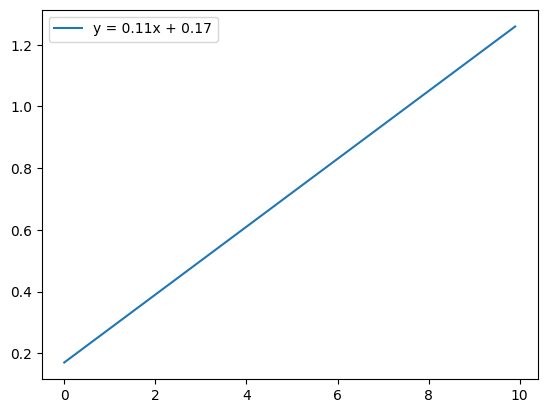

In [179]:
# Sample data for regression
X = np.arange(0, 10, 0.1).reshape(-1, 1)
y = 0.11 * X + 0.17
print(X.shape, y.shape)

# Plot data
plt.plot(X, y, label="y = 0.11x + 0.17")
plt.legend()
plt.show()

In [180]:
# Split to train and test data
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [ ]:
# Empty activation for linear regression
class EmptyActivation:
  def f(self, x):
    return x

  def fp(self, x):
    return np.ones_like(x)

In [182]:
# Our model
np.random.seed(RANDOM_SEED)
model_own = NeuralNetwork(1, [10], 1)
model_own.a[-1] = EmptyActivation()
model_own.train(X_train, y_train, epochs=1000, lr=0.01)

Epoch 0, Loss: 134.7392
Epoch 100, Loss: 0.0923
Epoch 200, Loss: 0.0760
Epoch 300, Loss: 0.0638
Epoch 400, Loss: 0.0529
Epoch 500, Loss: 0.0420
Epoch 600, Loss: 0.0318
Epoch 700, Loss: 0.0231
Epoch 800, Loss: 0.0163
Epoch 900, Loss: 0.0113


In [183]:
# Pytorch model
class PytorchRegression(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(input_shape, hidden_units),
      nn.ReLU(),
      nn.Linear(hidden_units, output_shape),
    )

  def forward(self, x):
    return self.layers(x)

torch.manual_seed(RANDOM_SEED)
model_torch = PytorchRegression(1, 10, 1).to(device)

In [184]:
# Set up loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model_torch.parameters(), lr=0.01)

# Training loop
torch.manual_seed(RANDOM_SEED)
epochs = 1000
for epoch in range(epochs):
  model_torch.train()
  y_pred = model_torch(X_train_tensor)
  loss = loss_fn(y_pred, y_train_tensor)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 1.0719
Epoch 100, Loss: 0.0022
Epoch 200, Loss: 0.0018
Epoch 300, Loss: 0.0015
Epoch 400, Loss: 0.0012
Epoch 500, Loss: 0.0010
Epoch 600, Loss: 0.0009
Epoch 700, Loss: 0.0007
Epoch 800, Loss: 0.0006
Epoch 900, Loss: 0.0005


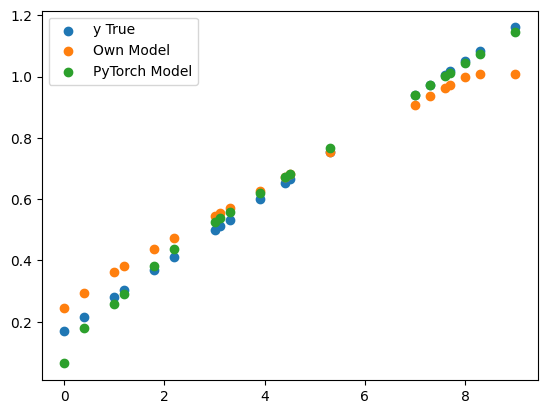

In [185]:
# Plot prediction
zs, As = model_own.forward(X_test)
own_pred = As[-1].reshape(-1)

model_torch.eval()
with torch.inference_mode():
  y_pred_tensor = model_torch(X_test_tensor)
  torch_pred = y_pred_tensor.cpu().detach().numpy().reshape(-1)

plt.scatter(X_test, y_test, label="y True")
plt.scatter(X_test, own_pred, label="Own Model")
plt.scatter(X_test, torch_pred, label="PyTorch Model")
plt.legend()
plt.show()

## Compare Performance with Pytorch: Linear Regression with Larger Range

(100, 1) (100, 1)


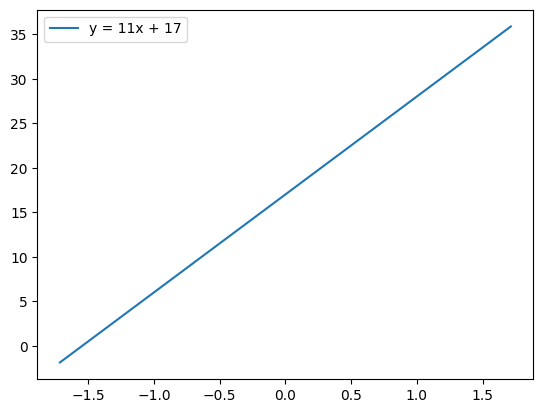

In [198]:
# Sample data for regression
X = np.arange(0, 100, 1).reshape(-1, 1)

# Normalize X
X = (X - X.mean()) / X.std()

y = 11 * X + 17
print(X.shape, y.shape)

# Plot data
plt.plot(X, y, label="y = 11x + 17")
plt.legend()
plt.show()

In [199]:
# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [200]:
# Our model
np.random.seed(RANDOM_SEED)
model_own = NeuralNetwork(1, [10], 1)
model_own.a[-1] = EmptyActivation()
model_own.train(X_train, y_train, epochs=1000, lr=0.01)

Epoch 0, Loss: 322.4538
Epoch 100, Loss: 0.2822
Epoch 200, Loss: 0.2163
Epoch 300, Loss: 0.1741
Epoch 400, Loss: 0.1427
Epoch 500, Loss: 0.1188
Epoch 600, Loss: 0.1004
Epoch 700, Loss: 0.0854
Epoch 800, Loss: 0.0731
Epoch 900, Loss: 0.0631


In [201]:
# Pytorch model
torch.manual_seed(RANDOM_SEED)
model_torch = PytorchRegression(1, 10, 1).to(device)

# Set up loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model_torch.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
  model_torch.train()
  y_pred = model_torch(X_train_tensor)
  loss = loss_fn(y_pred, y_train_tensor)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 430.8753
Epoch 100, Loss: 0.1911
Epoch 200, Loss: 0.0437
Epoch 300, Loss: 0.0215
Epoch 400, Loss: 0.0151
Epoch 500, Loss: 0.0115
Epoch 600, Loss: 0.0091
Epoch 700, Loss: 0.0075
Epoch 800, Loss: 0.0063
Epoch 900, Loss: 0.0055


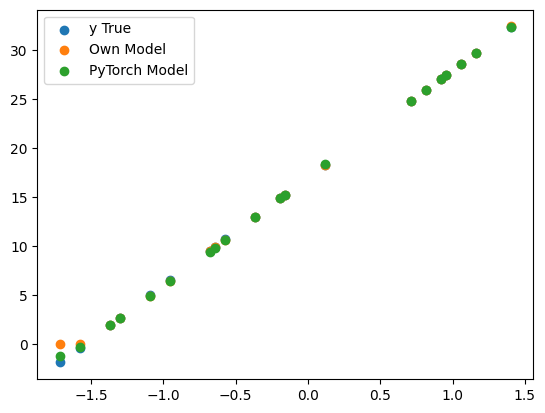

In [195]:
# Plot prediction
zs, As = model_own.forward(X_test)
own_pred = As[-1].reshape(-1)

model_torch.eval()
with torch.inference_mode():
  y_pred_tensor = model_torch(X_test_tensor)
  torch_pred = y_pred_tensor.cpu().detach().numpy().reshape(-1)

plt.scatter(X_test, y_test, label="y True")
plt.scatter(X_test, own_pred, label="Own Model")
plt.scatter(X_test, torch_pred, label="PyTorch Model")
plt.legend()
plt.show()

## Compare Performance with Pytorch: Classification with Moon dataset

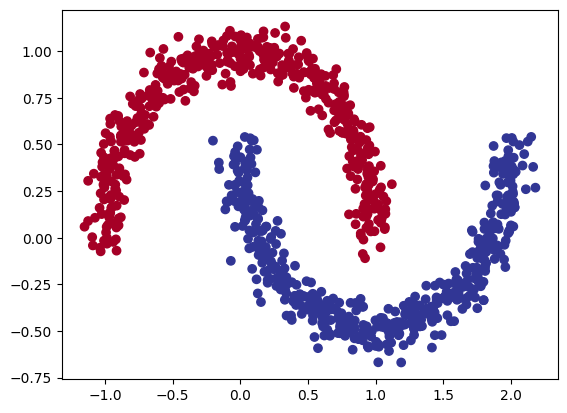

In [197]:
X_moon, y_moon = make_moons(n_samples=1000, noise=0.07, random_state=RANDOM_SEED)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap=plt.cm.RdYlBu)
plt.show()